# Analyze EEG Data

This notebook will help you analyze the class EEG dataset. To run this, you will need to upload `EEG.mat` from [our data folder](http://bit.ly/BIPN145_data) into your DataHub. 

>**Task**: Run the cell below to get started.

In [94]:
# Set up interactive matplot lib and define a function to interact with plots
%matplotlib nbagg

def onclick(event):
    pos.append([event.xdata,event.ydata])

# Import our packages
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import loadmat

# Load the relevant data set
data = loadmat('EEG.mat')['data'][0]*1e6 # Get data and convert to uV
dataend = loadmat('EEG.mat')['dataend'][2]
datastart = loadmat('EEG.mat')['datastart'][2]
eyes_closed = loadmat('EEG.mat')['com']

# Get the sampling rate and can create a time axis for our data
sampling_rate = 400
timestamps = (np.arange(0, len(data)) * (1.0 / sampling_rate))

print('Let\'s do this thing.')

Let's do this thing.


## Look for EEG waves

There are three trials here, about one minute each. Participants had their eyes open for the first 30 seconds, and closed for the second 30 seconds.

### Using the interactive plot
The x (time, in ms) and y (voltage, in volts) position of your cursor will update in the bottom left corner. You can use these values to make your calculations. You can create a box to Zoom into using the Zoom button below, and return to the home view using the Home button. The crosshairs button will allow you to pan through the recording.

<IPython.core.display.Javascript object>


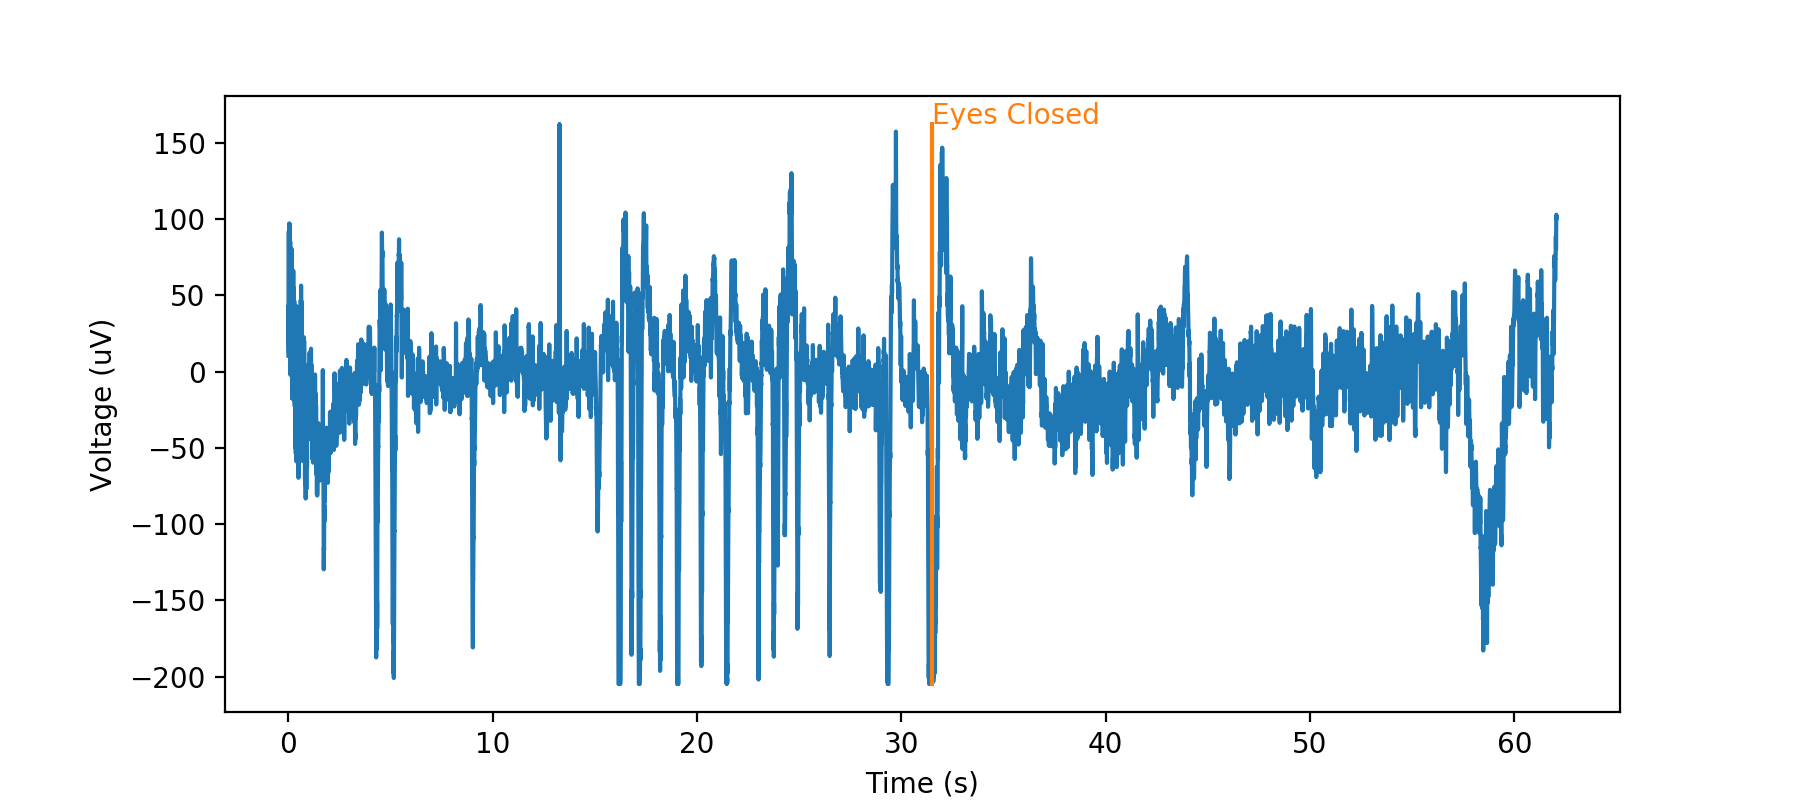

In [105]:
# Change the trial below
this_trial = 0

trial_data = data[int(datastart[this_trial]):int(dataend[this_trial])]
trial_timestamps = timestamps[int(datastart[this_trial]):int(dataend[this_trial])]
closed_timestamp = eyes_closed[this_trial][2]/400

# set up figure & plt
fig,ax = plt.subplots(figsize=(9,4))

plt.plot(trial_timestamps,trial_data)
plt.plot([closed_timestamp,closed_timestamp],[trial_data.min(),trial_data.max()])
plt.text(closed_timestamp,trial_data.max(),'Eyes Closed',color='tab:orange')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
#plt.xlim([30,40])
plt.show()

## Calculate the power spectrum

<IPython.core.display.Javascript object>


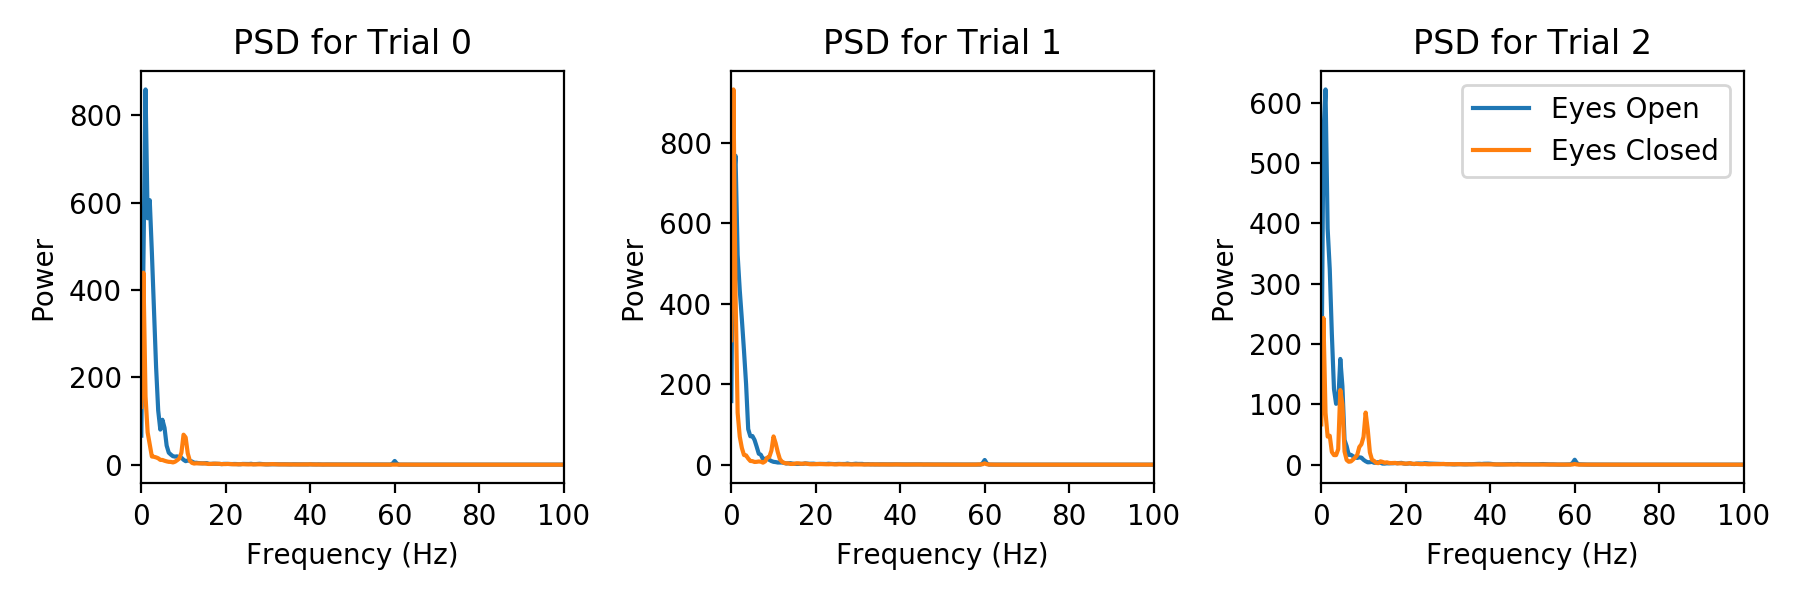

In [104]:
# Import our signal processing package
from scipy import signal

# Define sliding window length (4 seconds, which will give us 2 full cycles at 0.5 Hz)
win = 2 * sampling_rate

# Plot our data
fig,ax = plt.subplots(1,3,figsize=(9,3))

for trial in range(3):
    open_data = data[int(datastart[trial]):int(datastart[trial]+eyes_closed[trial][2])]
    closed_data = data[int(datastart[trial]+eyes_closed[trial][2]):int(dataend[trial])]
    freqs, psd = signal.welch(open_data, sampling_rate, nperseg=win)
    closed_freqs, closed_psd = signal.welch(closed_data, sampling_rate, nperseg=win)
    ax[trial].plot(freqs,psd) # Plot a select range of frequencies
    ax[trial].plot(closed_freqs,closed_psd) # Plot a select range of frequencies
    ax[trial].set_title('PSD for Trial ' + str(trial))
    ax[trial].set_ylabel('Power')
    ax[trial].set_xlabel('Frequency (Hz)')
    ax[trial].set_xlim([0,100])

plt.legend(['Eyes Open','Eyes Closed'])
plt.tight_layout()    
plt.show()

In [ ]:
from IPython.display import HTML
HTML('<img src="https://media2.giphy.com/media/2seGQ9JQrHzPlNgqFY/giphy.gif">')